<a href="https://colab.research.google.com/github/Aftabgazali/Classification-ANN-Model/blob/main/Classification_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
X=df.iloc[:,3:-1].values
y=df.iloc[:,-1].values

## **Encoding Categorical Data**

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [33]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [35]:
print(X[0,:])
# France 1 0 0  gender--> female-> 0

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


## **Feature Scaling**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
# Feature Scaling is Important for all Artificial Model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## **Building the ANN**

In [38]:
ann=tf.keras.models.Sequential()

In [39]:
# Adding the Input Layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [40]:
# Adding the Second hidden Layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [41]:
# Adding the Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training the ANN Model**

## **Compiling the ANN**

In [42]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.8273 - accuracy: 0.3785
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.7852
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.7980
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.7947
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.8009
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.8112
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.8208
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.8344
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8461
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4065 - accura

## **Predicting the Results**

In [44]:
# Geography: France
# Score: 600
# Gender: Male
# Age: 40 years
# Tenure: 3years
# Balance: 60,000
# Number of prod.: 2
# Estimated Salary: 50000
# Both Active members
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)
# Hence we should not say goodbye to this coustomer

[[False]]


## **Making Confusion Matrix**

In [49]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.865

Text(69.0, 0.5, 'Truth')

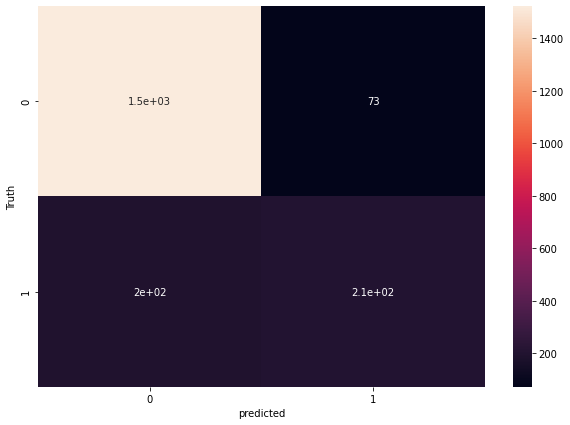

In [57]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')